In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import seaborn as sns
import string
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

nltk.download("vader_lexicon")
nltk.download("stopwords")

 # show all answers
pd.set_option("display.max_rows", None)

stopwords = nltk.corpus.stopwords.words("english")
ps = PorterStemmer()
sia = SentimentIntensityAnalyzer()

# load csv file
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

# replace the column names with a shorter one for convenience
question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

# format the dataframe
data = pd.DataFrame(
    {
        "answers": pd.concat(
            [df["Q1"], df["Q2"], df["Q3"], df["Q4"], df["Q5"],
            df["Q6"], df["Q7"], df["Q8"], df["Q9"], df["Q10"]],
            ignore_index=True
        ),
        "label": pd.concat(
            [df["Q1_label"], df["Q2_label"], df["Q3_label"], df["Q4_label"], df["Q5_label"],
            df["Q6_label"], df["Q7_label"], df["Q8_label"], df["Q9_label"], df["Q10_label"]],
            ignore_index=True
        )
    }
)

# drop na values
vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
for item in vals_to_drop:
    data.loc[data["answers"] == item] = pd.NA
data.dropna(inplace=True)

def tokenize(txt):
    tokens = re.split("\W+", txt)
    return tokens

def remove_stopwords(txt):
    txt_clean = [word for word in txt if word not in stopwords]
    return txt_clean

def stemming(tokenized_txt):
    txt = [ps.stem(word) for word in tokenized_txt]
    return txt

data["answers_tokenized"] = data["answers"].apply(lambda x: tokenize(x.lower()))
data["answers_no_sw"] = data["answers_tokenized"].apply(lambda x: remove_stopwords(x))
data["answers_stemmed"] = data["answers_no_sw"].apply(lambda x: stemming(x))
data["polarity_scores"] = data["answers"].apply(lambda answer: sia.polarity_scores(answer))
data["neg"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
data["neu"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
data["pos"] = data["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
data["compound"] = data["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
data["compound_score"] = data["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

print("Accuracy Score:", accuracy_score(data["label"], data["compound_score"]))
print("Classification Report:\n", classification_report(data["label"], data["compound_score"], zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(data["label"], data["compound_score"]))

data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score: 0.8036363636363636
Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.70      0.76       258
         neu       0.71      0.92      0.80       167
         pos       0.84      0.82      0.83       400

    accuracy                           0.80       825
   macro avg       0.79      0.81      0.80       825
weighted avg       0.81      0.80      0.80       825

Confusion Matrix:
 [[180  25  53]
 [  3 154  10]
 [ 33  38 329]]


,answers,label,answers_tokenized,answers_no_sw,answers_stemmed,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"[yes, because, it, helps, me, peak, my, intere...","[yes, helps, peak, interests, radiobroadcastin...","[ye, help, peak, interest, radiobroadcast, fil...","{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"[yes, because, i, am, interested, at, my, cour...","[yes, interested, course, ]","[ye, interest, cours, ]","{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"[yes, because, i, love, what, i, do, ]","[yes, love, ]","[ye, love, ]","{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"[i, feel, that, it, is, lacking, with, the, in...","[feel, lacking, increase, tuition, fee, compar...","[feel, lack, increas, tuition, fee, compar, fa...","{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"[yes, because, it, is, my, passion, and, i, am...","[yes, passion, curious, different, topics, ]","[ye, passion, curiou, differ, topic, ]","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
5,Im satisfied with my course. My knowledge lear...,pos,"[im, satisfied, with, my, course, my, knowledg...","[im, satisfied, course, knowledge, learning, c...","[im, satisfi, cours, knowledg, learn, cours, b...","{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.000,0.749,0.251,0.6908,pos
6,"Yes, I am satisfied. It is very fun learning n...",pos,"[yes, i, am, satisfied, it, is, very, fun, lea...","[yes, satisfied, fun, learning, new, different...","[ye, satisfi, fun, learn, new, differ, stuff, ...","{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...",0.000,0.569,0.431,0.8439,pos
7,No. Because I do not have any access to labora...,neg,"[no, because, i, do, not, have, any, access, t...","[access, laboratory, room, equipment, ]","[access, laboratori, room, equip, ]","{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.2960,neg
8,Yes. I believe that we have competent and know...,pos,"[yes, i, believe, that, we, have, competent, a...","[yes, believe, competent, knowledgable, profes...","[ye, believ, compet, knowledg, professor, ]","{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...",0.000,0.583,0.417,0.6124,pos
9,Yes. The course I took is in line with my inte...,pos,"[yes, the, course, i, took, is, in, line, with...","[yes, course, took, line, interests, satisfied, ]","[ye, cours, took, line, interest, satisfi, ]","{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.7579,pos


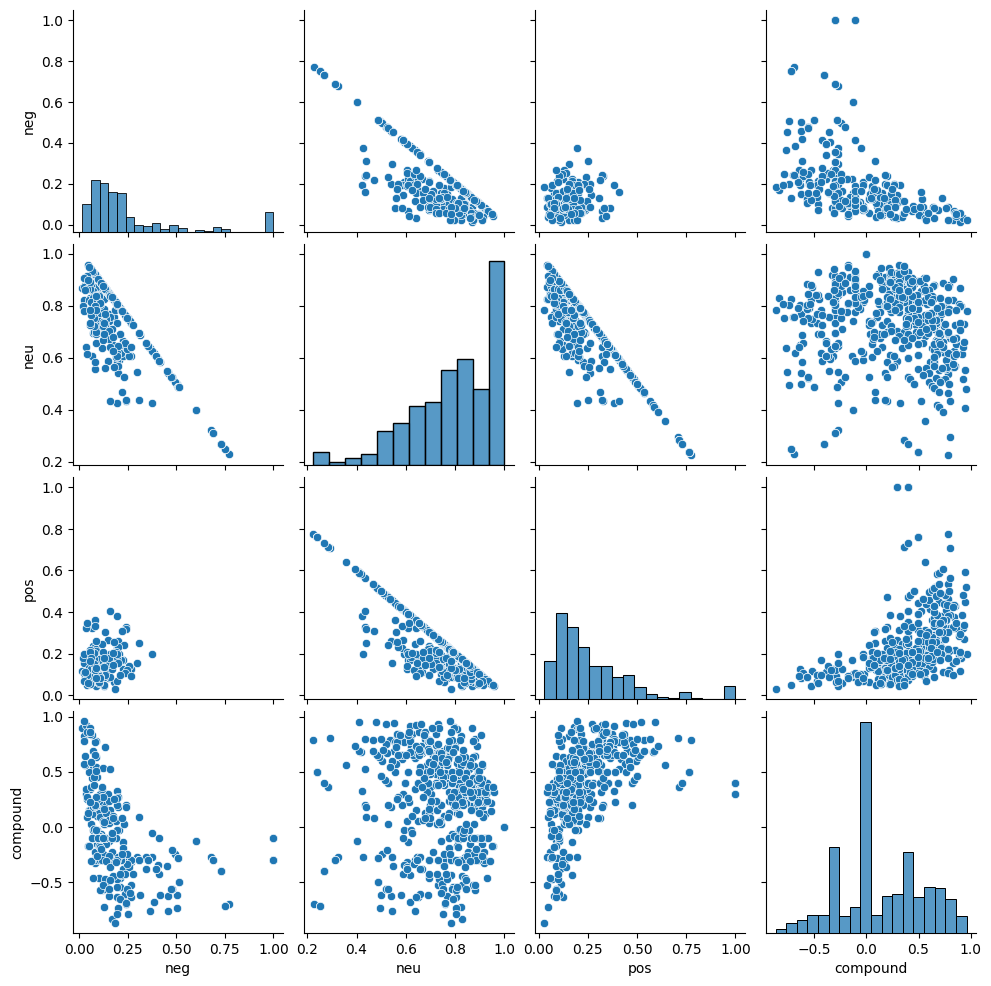

In [2]:
# "Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters."
# for example, the relationships between pos as the x-value, with neg as the y-value, is shown in the second graph, which is a scatter plot.
# if plotted against itself, it will show a histogram instead. (look at the graphs from the top left to the bottom right)

def n(val):
    return [float("nan") if x == 0 else x for x in val]

data["neg"] = n(data["neg"])
data["neu"] = n(data["neu"])
data["pos"] = n(data["pos"])

sns.pairplot(data[["neg", "neu", "pos", "compound"]])

<Axes: xlabel='compound', ylabel='Count'>

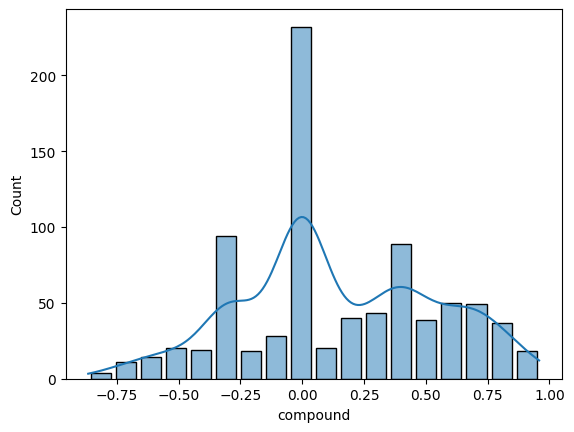

In [3]:
# this histogram plot shows the frequency distribution of data points across a range of numerical values. this particular plot shows that 0 and values really close to it shows up the most often.
sns.histplot(data["compound"], kde=True, shrink=.8)

In [4]:
data.describe()

,neg,neu,pos,compound
count,311.000000,789.000000,438.000000,825.000000
mean,0.248942,0.799823,0.266009,0.141596
std,0.252866,0.180369,0.200443,0.393160
min,0.016000,0.225000,0.030000,-0.865800
25%,0.095500,0.690000,0.127500,-0.077200
50%,0.157000,0.823000,0.205500,0.000000
75%,0.249000,1.000000,0.346000,0.421500
max,1.000000,1.000000,1.000000,0.958700


In [5]:
data["label"].value_counts()

pos    400
neg    258
neu    167
Name: label, dtype: int64

In [6]:
data["compound_score"].value_counts()

pos    392
neu    217
neg    216
Name: compound_score, dtype: int64

<Axes: xlabel='label', ylabel='count'>

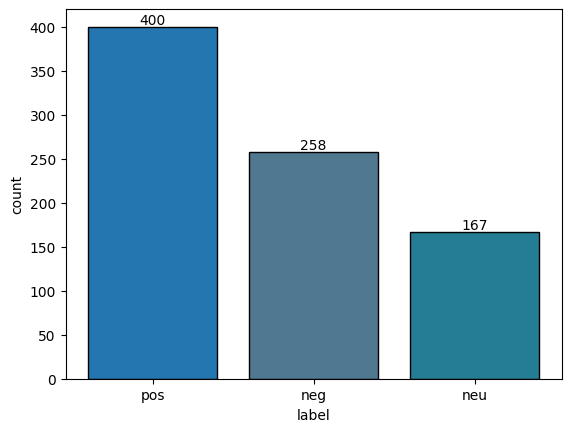

In [7]:
# this shows the total count for each value in the "label" column.
ax1 = sns.countplot(x="label", data=data)
ax1.bar_label(ax1.containers[0])
sns.histplot(data["label"], bins=30, shrink=.8)

In [8]:
# this shows the total count for each value in the "compound_score" column.
ax2 = sns.countplot(x="compound_score", data=data)
ax2.bar_label(ax2.containers[0])
sns.histplot(data["compound_score"], shrink=.8)

<Axes: xlabel='compound_score', ylabel='count'>